In [40]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
# load the 4 datastet 

cpu1k = pd.read_csv('cpu-1200.csv')
cpu12k = pd.read_csv('cpu-12000.csv')
gpu1k = pd.read_csv('gpu-1200.csv')
gpu12k = pd.read_csv('gpu-12000.csv')

In [70]:
# function to aggregate values
def pre_process(data, gpu=False):
    groupped_data = data.groupby(["size", "what"])
    
    result = groupped_data.agg(average_time=('time', 'mean'),
                               sd=('time', 'std'),
                               min_time=('time', 'min'),
                               max_time=('time', 'max')
                               ).reset_index()
    # gpu have 4 MPI processes per node
    if gpu:
        result['size'] = result['size'] / 4
    return result
    
cpu_1k = pre_process(cpu1k)
cpu_12k = pre_process(cpu12k)
gpu_1k = pre_process(gpu1k, gpu=True)
gpu_12k = pre_process(gpu12k, gpu=True)

In [56]:
gpu_1k

,size,what,average_time,sd,min_time,max_time
0,128,computation,0.000222,0.000097,0.000151,0.000526
1,128,copy-matrix-cpu-to-gpu,0.000873,0.000462,0.000101,0.001752
2,128,copy-matrix-gpu-to-cpu,0.000071,0.000007,0.000058,0.000096
3,128,matrix-initialization,0.000325,0.000270,0.000028,0.000987
4,128,mpi-send-rec,0.045060,0.010128,0.027427,0.065047


# Plot the results

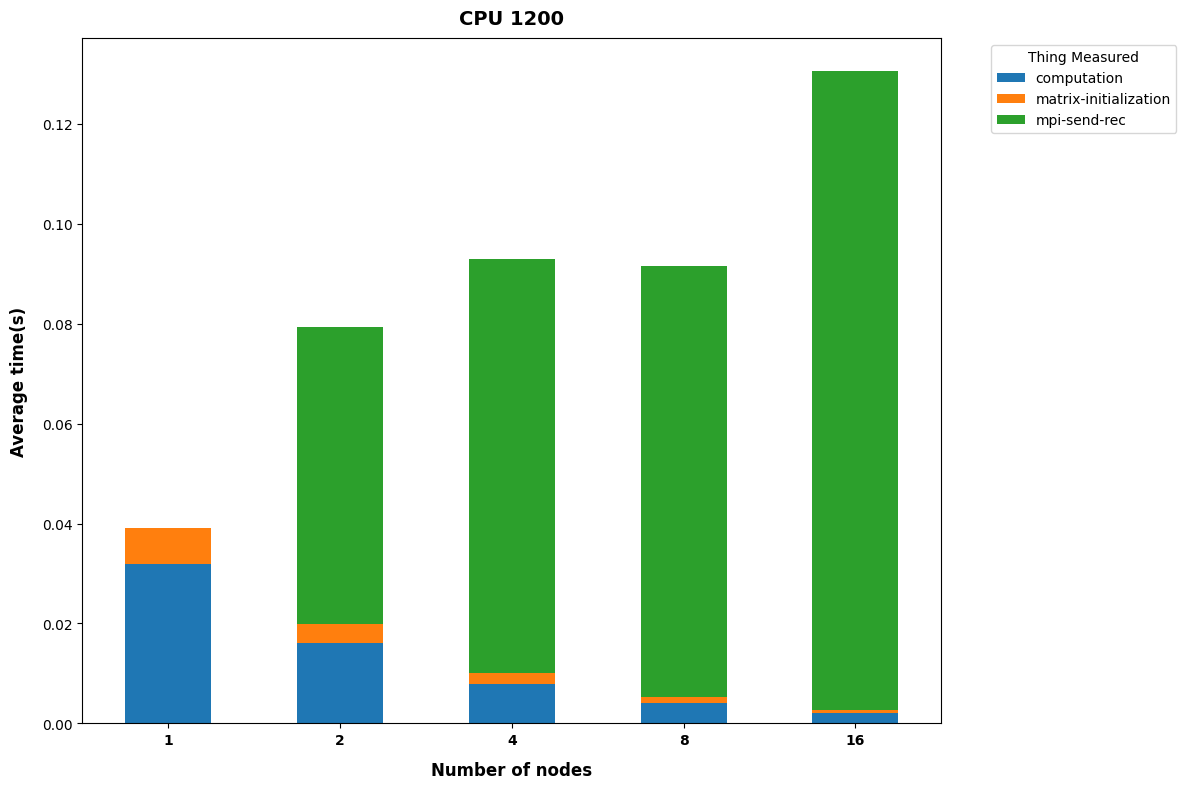

In [44]:
def plot_single_stack(data, title, ylim=None):
    extracted = data[["size", "what", "average_time"]]
    extracted.reset_index(drop=True, inplace=True)
    # pivot the table to perform the stacked bar plot
    pivot_df = extracted.pivot(index='size', columns='what', values='average_time')
    # plotting 
    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))
    ax.set_ylabel('Average time(s)', fontsize=12, fontweight='bold', labelpad=10)
    ax.set_xlabel('Number of nodes', fontsize=12, fontweight='bold', labelpad=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    plt.xticks(fontsize=10, fontweight='bold')
    if ylim:                    # for some plot auto scale crop the first column
        ax.set_ylim(ylim)
    ax.set_title(title, fontsize=14, fontweight='bold', pad=10)
    plt.legend(title='Thing Measured', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
plot_single_stack(cpu_1k, 'CPU 1200')

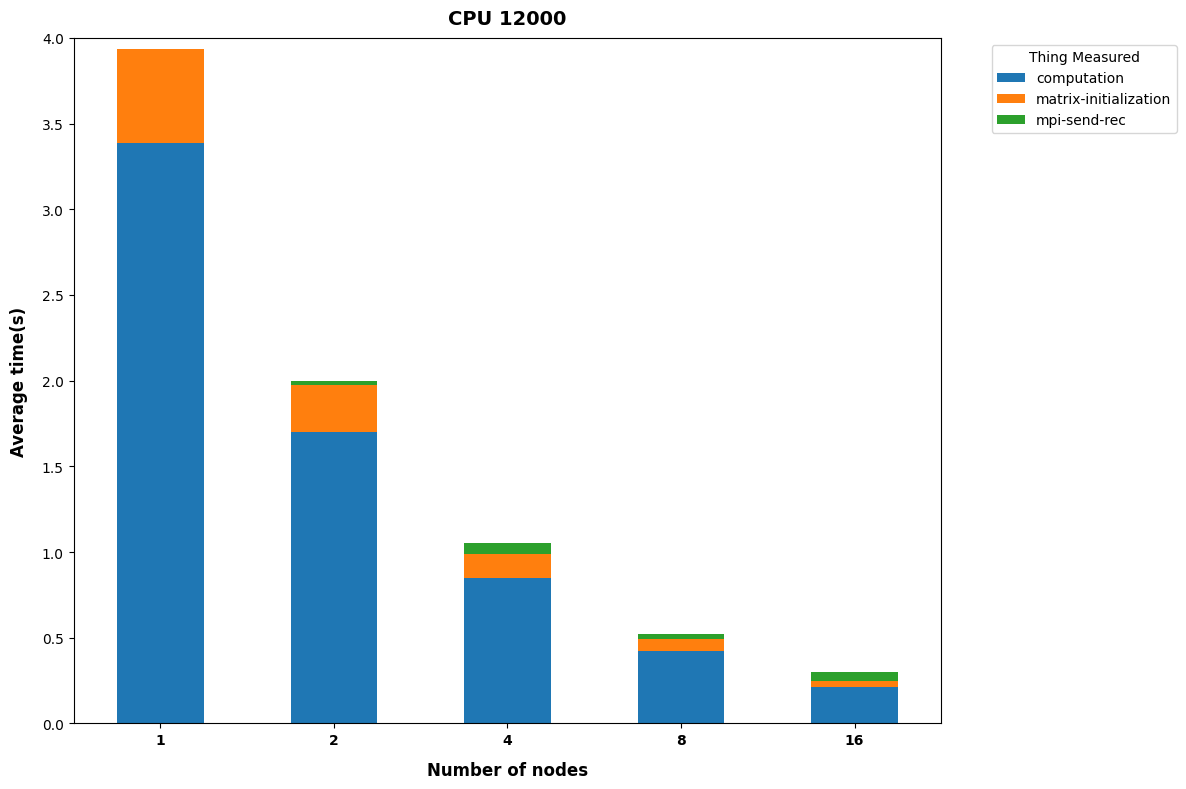

In [45]:
plot_single_stack(cpu_12k, 'CPU 12000', ylim=(0, 4))

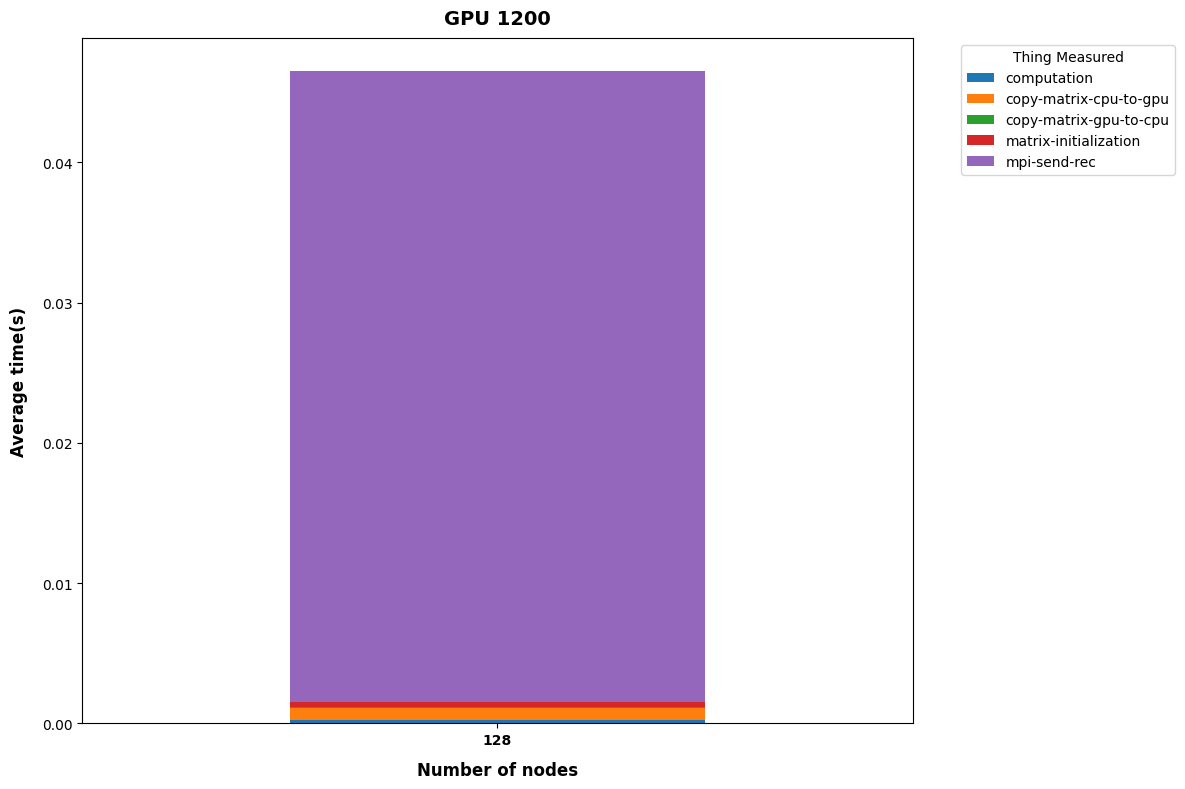

In [50]:
plot_single_stack(gpu_1k, 'GPU 1200')

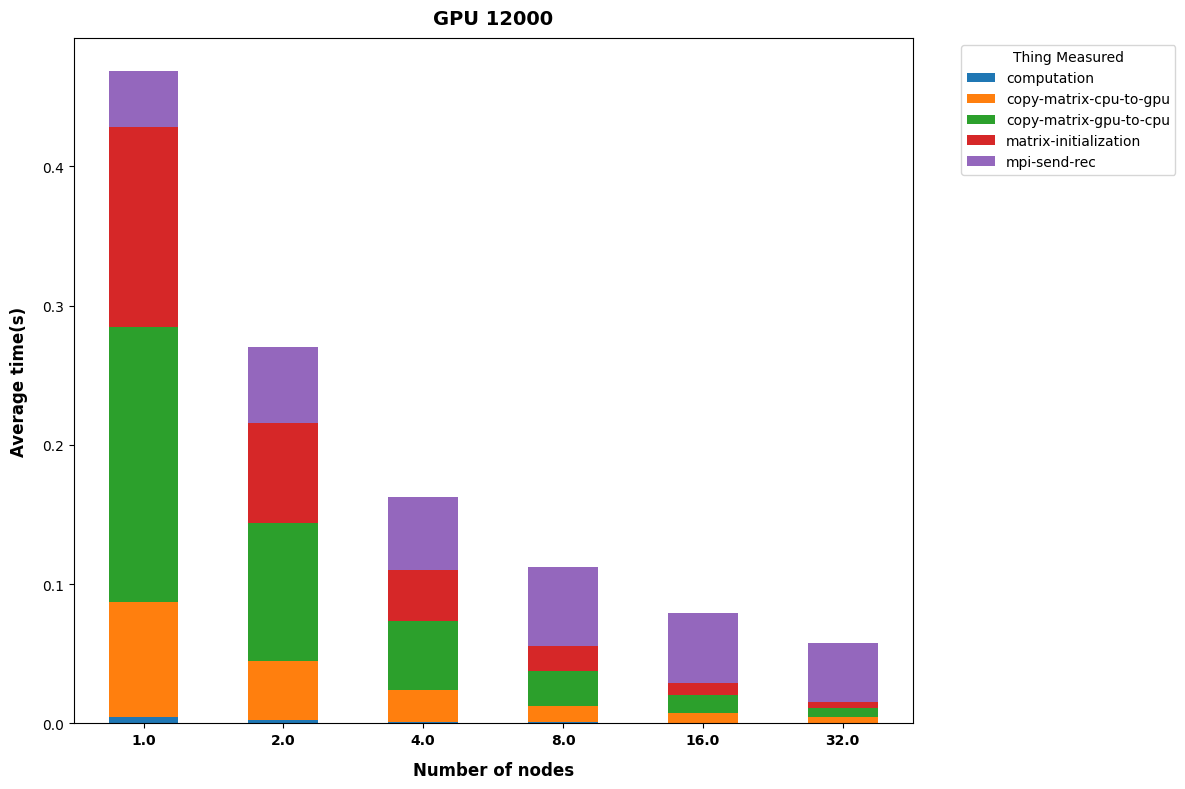

In [74]:
plot_single_stack(gpu_12k, 'GPU 12000')